In [22]:
import numpy as np
#import pandas
import matplotlib.pyplot as plt
import sys

#points in the grid
npx, npy = 200, 200

# function to generate the grid 
def gen_sample_grid(npx=200, npy=200, limit = 1):
  x1line = np.linspace(0, limit, npx)
  x2line = np.linspace(0, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(npx,npy)

# defining the weighting
# create a dictionary to map all the variables
weights = {
    'a1' : np.transpose(np.array([[1.3,-1,-3,-10]])),
    'a2' :  np.transpose(np.array([[-1,1.5,3,-1]])),
    'a3' :  np.transpose([[0.4,-0.1,-0.1,3]]),
    'a4' :  np.transpose(np.array([[0.5,-1,1,-0.1]])),
    'a5' :  np.transpose(np.array([[-0.2,1.5,-1,0.4]]))
}

# checking the shapes of all weights dimensions is correct
for i in range(1,5):
    var = 'a%d' %i
    if weights[var].shape != (4,1):
       print('\nError!! Shape of a%d is incorrect\n' %i)
       sys.exit()

# check the grid dimension
if Xgrid.shape != (npx*npy,2):
   size = Xgrid.shape
   print('Xgrid is in the wrong size, Actual size', size, 'Expected size',npx*npy)    

#if a1.shape != (3,1):
#  print("Error!! Shape of %d is incorrect", )

In [23]:
print(Xgrid.shape)

(40000, 2)


In [24]:
x1_x2.shape

(40000, 1)

In [25]:
# y is a [1,x1,x2,x1*x2] so add 1 at the start of each value
#x1_x2 = np.reshape(x1_x2,[npx*npy,1])
x1_x2 = np.reshape(np.array(Xgrid[:,0]*Xgrid[:,1]).T,[npx*npy,1])
print('x12 shape',np.shape(x1_x2))

Ygrid = np.concatenate([np.ones([npx * npy,1]), Xgrid, x1_x2],axis=1)
#Ygrid = np.concatenate([Ygrid, x1_x2],axis=1)
print(Ygrid.shape)
#Ygrid = np.concatenate([[x1line*x2line],Xgrid],axis=2)



x12 shape (40000, 1)
(40000, 4)


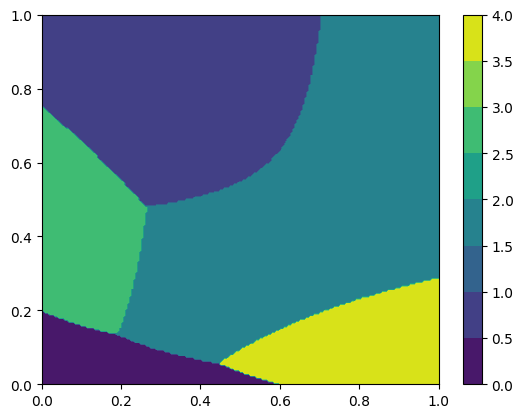

In [26]:
# calculate each of the five functions as before
g1 = np.matmul(Ygrid,weights['a1'])
g2 = np.matmul(Ygrid,weights['a2'])
g3 = np.matmul(Ygrid,weights['a3'])
g4 = np.matmul(Ygrid,weights['a4'])
g5 = np.matmul(Ygrid,weights['a5'])

#combine all five functions together
gconc = np.concatenate([g1,g2,g3,g4,g5],axis=1)

# find which of values is largest for each row
gconc = np.argmax(gconc,axis=1)

# reshaping back into the a 200x200 grid
gconc = np.reshape(gconc,[npx,npy])

# plotting the graph
plt.contourf(x1line,x2line,gconc,cmap='viridis')
plt.colorbar()
plt.show()